# INF552 HW-6 Zhifeng Liu 2912549136

### 1. Supervised, Semi-Supervised, and Unsupervised Learning

In [137]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score, f1_score
import warnings
warnings.filterwarnings('ignore')

In [136]:
import pandas as pd
data = pd.read_csv("./wdbc.data.csv", sep=",",header=None).drop([0], axis=1)
data = data.replace('B',1)
data = data.replace('M',0)
print(data.head())

   1      2      3       4       5        6        7       8        9   \
0   0  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.3001  0.14710   
1   0  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869  0.07017   
2   0  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974  0.12790   
3   0  11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414  0.10520   
4   0  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.1980  0.10430   

       10   ...        22     23      24      25      26      27      28  \
0  0.2419   ...     25.38  17.33  184.60  2019.0  0.1622  0.6656  0.7119   
1  0.1812   ...     24.99  23.41  158.80  1956.0  0.1238  0.1866  0.2416   
2  0.2069   ...     23.57  25.53  152.50  1709.0  0.1444  0.4245  0.4504   
3  0.2597   ...     14.91  26.50   98.87   567.7  0.2098  0.8663  0.6869   
4  0.1809   ...     22.54  16.67  152.20  1575.0  0.1374  0.2050  0.4000   

       29      30       31  
0  0.2654  0.4601  0.11890  
1  0.1860  0.2750  0.08902  
2  0.2430  

### (b)i. Supervised learning with Monte-Carlo Simulation

In [30]:
sl_train_acc = []
sl_train_prec = []
sl_train_recall = []
sl_train_f1 = []
sl_train_auc = []
sl_test_acc = []
sl_test_prec = []
sl_test_recall = []
sl_test_f1 = []
sl_test_auc = []
def sl_model(train_x, train_y, test_x, text_y, flag):
    param_grid = {'C': np.logspace(-3, 3, 5)}
    svc = LinearSVC(penalty='l1', dual=False)
    kf = StratifiedKFold(n_splits=5, shuffle=True)
    clf = GridSearchCV(svc, param_grid, cv=kf, scoring='accuracy')
    clf.fit(train_x, train_y)  
    
    train_y_pred = clf.predict(train_x)
    
    acc_train = accuracy_score(train_y, train_y_pred)
    sl_train_acc.append(acc_train)
    prec_train = precision_score(train_y, train_y_pred)
    sl_train_prec.append(prec_train)
    recall_train = recall_score(train_y, train_y_pred)
    sl_train_recall.append(recall_train)
    f1_train = f1_score(train_y, train_y_pred)
    sl_train_f1.append(f1_train)
    
    fpr, tpr, threshold = metrics.roc_curve(train_y, train_y_pred)
    auc_train = metrics.auc(fpr, tpr)
    sl_train_auc.append(auc_train)
    print("For training dataset, accuracy = %.3f, precision = %.3f, recall = %.3f, F1 score = %.3f, AUC = %.3f" %(acc_train, prec_train, recall_train,f1_train,auc_train))

    #test dataset
    test_y_pred = clf.predict(test_x)
    acc_test = accuracy_score(text_y, test_y_pred)
    sl_test_acc.append(acc_test)
    prec_test = precision_score(text_y, test_y_pred)
    sl_test_prec.append(prec_test)
    recall_test = recall_score(text_y, test_y_pred)
    sl_test_recall.append(recall_test)
    f1_test = f1_score(text_y, test_y_pred)
    sl_test_f1.append(f1_test)
    fpr, tpr, threshold = metrics.roc_curve(test_y, test_y_pred)
    auc_test = metrics.auc(fpr, tpr)
    sl_test_auc.append(auc_test)
    print("For test dataset, accuracy = %.3f, precision = %.3f, recall = %.3f, F1 score = %.3f, AUC = %.3f" %(acc_test, prec_test, recall_test,f1_test,auc_test))
    
    if flag:
        print("\nThe confusion matrix of training dataset:")
        print(metrics.confusion_matrix(train_y, train_y_pred))
        print("\nThe ROC curve for training dataset:")
        fpr, tpr, threshold = metrics.roc_curve(train_y, train_y_pred)
        roc_auc = metrics.auc(fpr, tpr)
        plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
        plt.legend(loc = 'lower right')
        plt.plot([0, 1], [0, 1],'r--')
        plt.xlim([0, 1])
        plt.ylim([0, 1.05])
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.show()
        print("The confusion matrix of test dataset:")
        print(metrics.confusion_matrix(test_y, test_y_pred))
        print("\nThe ROC curve for testing dataset:")
        fpr, tpr, threshold = metrics.roc_curve(test_y, test_y_pred)
        roc_auc = metrics.auc(fpr, tpr)
        plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
        plt.legend(loc = 'lower right')
        plt.plot([0, 1], [0, 1],'r--')
        plt.xlim([0, 1])
        plt.ylim([0, 1.05])
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.show()
        


The No.1 epoch in Monte-Carlo:
For training dataset, accuracy = 0.971, precision = 0.975, recall = 0.978, F1 score = 0.976, AUC = 0.970
For test dataset, accuracy = 0.649, precision = 0.664, recall = 0.961, F1 score = 0.785, AUC = 0.562

The No.2 epoch in Monte-Carlo:
For training dataset, accuracy = 0.969, precision = 0.972, recall = 0.979, F1 score = 0.976, AUC = 0.966
For test dataset, accuracy = 0.588, precision = 0.644, recall = 0.855, F1 score = 0.734, AUC = 0.651

The No.3 epoch in Monte-Carlo:
For training dataset, accuracy = 0.967, precision = 0.972, recall = 0.976, F1 score = 0.974, AUC = 0.964
For test dataset, accuracy = 0.614, precision = 0.651, recall = 0.908, F1 score = 0.758, AUC = 0.591

The No.4 epoch in Monte-Carlo:
For training dataset, accuracy = 0.967, precision = 0.970, recall = 0.980, F1 score = 0.975, AUC = 0.962
For test dataset, accuracy = 0.614, precision = 0.663, recall = 0.855, F1 score = 0.747, AUC = 0.660

The No.5 epoch in Monte-Carlo:
For training dat

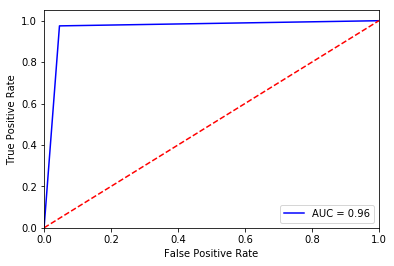

The confusion matrix of test dataset:
[[ 8 30]
 [ 0 76]]

The ROC curve for testing dataset:


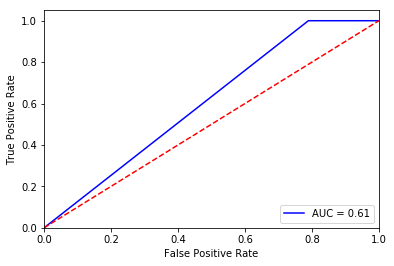

                  AUC  Accuracy        F1  Precision    Recall
sl_training  0.971384  0.974835  0.979952   0.975022  0.984969
sl_test      0.565329  0.480848  0.381644   0.331539  0.450000


In [36]:
    train_metrics = {}
    test_metrics = {}
    for i in range(0,30):
        print("\nThe No.%d epoch in Monte-Carlo:" %(i+1))
        train_x, test_x, train_y, test_y = train_test_split(data.drop([1], axis=1), data.loc[:,[1]], test_size = 0.2)
        nor_train_x = preprocessing.normalize(train_x)
        if i==29:
            sl_model(nor_train_x, train_y, test_x, text_y, True)
        else:
            sl_model(nor_train_x, train_y, test_x, text_y, False)
    train_metrics["Accuracy"] = np.mean(sl_train_acc)
    train_metrics["Precision"] = np.mean(sl_train_prec)
    train_metrics["Recall"] = np.mean(sl_train_recall)
    train_metrics["F1"] = np.mean(sl_train_f1)
    train_metrics["AUC"] = np.mean(sl_train_auc)
    test_metrics["Accuracy"] = np.mean(sl_test_acc)
    test_metrics["Precision"] = np.mean(sl_test_prec)
    test_metrics["Recall"] = np.mean(sl_test_recall)
    test_metrics["F1"] = np.mean(sl_test_f1)
    test_metrics["AUC"] = np.mean(sl_test_auc)
    
    sl_metrics = pd.DataFrame([train_metrics,test_metrics],index=["sl_training","sl_test"])
    print(sl_metrics)

### (b)ii. Semi-Supervised learning with Monte-Carlo Simulation

In [138]:
ss_train_acc = []
ss_train_prec = []
ss_train_recall = []
ss_train_f1 = []
ss_train_auc = []
ss_test_acc = []
ss_test_prec = []
ss_test_recall = []
ss_test_f1 = []
ss_test_auc = []
def ss_model(train_x, train_y, test_x, test_y, flag):

    lab_x, unlab_x, lab_y, unlab_y = train_test_split(train_x, train_y, test_size=0.5)
#     lab_x = pd.DataFrame(lab_x)
#     lab_y = pd.DataFrame(lab_y)
#     unlab_x = pd.DataFrame(unlab_x)

    param_grid = {'C': np.logspace(-3, 3, 5)}
    svc = LinearSVC(penalty='l1', dual=False)
    kf = StratifiedKFold(n_splits=5, shuffle=True)
    clf = GridSearchCV(svc, param_grid, cv=kf, scoring='accuracy')
    clf.fit(lab_x, lab_y)

    for i in range(len(unlab_x)):
        dist = pd.DataFrame()
        dist = pd.DataFrame(clf.decision_function(unlab_x)).abs().sort_values(by = [0],ascending = False)
        idx = dist.iloc[0,:].name
        holder = unlab_x[idx]
        lab_x = np.append(lab_x, [holder], axis=0)
#         b = clf.predict(lab_x)
#         c = lab_y.columns.values.tolist()
#         a = pd.DataFrame(b, columns=c)
#         lab_y = lab_y.append(a.iloc[-1])
        b = clf.predict([holder])
        c = lab_y.columns.values.tolist()
        a = pd.DataFrame(b, columns=c)
        lab_y = lab_y.append(a.iloc[0])
        clf.fit(lab_x, lab_y)

    train_y_pred = clf.predict(train_x)
    acc_train = accuracy_score(train_y, train_y_pred)
    ss_train_acc.append(acc_train)
    prec_train = precision_score(train_y, train_y_pred)
    ss_train_prec.append(prec_train)
    recall_train = recall_score(train_y, train_y_pred)
    ss_train_recall.append(recall_train)
    f1_train = f1_score(train_y, train_y_pred)
    ss_train_f1.append(f1_train)
    
    fpr, tpr, threshold = metrics.roc_curve(train_y, train_y_pred)
    auc_train = metrics.auc(fpr, tpr)
    ss_train_auc.append(auc_train)
    print("For training dataset, accuracy = %.3f, precision = %.3f, recall = %.3f, F1 score = %.3f, AUC = %.3f" %(acc_train, prec_train, recall_train,f1_train,auc_train))

    #test dataset
    test_y_pred = clf.predict(test_x)
    acc_test = accuracy_score(test_y, test_y_pred)
    ss_test_acc.append(acc_test)
    prec_test = precision_score(test_y, test_y_pred)
    ss_test_prec.append(prec_test)
    recall_test = recall_score(test_y, test_y_pred)
    ss_test_recall.append(recall_test)
    f1_test = f1_score(test_y, test_y_pred)
    ss_test_f1.append(f1_test)
    fpr, tpr, threshold = metrics.roc_curve(test_y, test_y_pred)
    auc_test = metrics.auc(fpr, tpr)
    ss_test_auc.append(auc_test)
    print("For test dataset, accuracy = %.3f, precision = %.3f, recall = %.3f, F1 score = %.3f, AUC = %.3f" %(acc_test, prec_test, recall_test,f1_test,auc_test))
    
    if flag:
        print("\nThe confusion matrix of training dataset:")
        print(metrics.confusion_matrix(train_y, train_y_pred))
        print("\nThe ROC curve for training dataset:")
        fpr, tpr, threshold = metrics.roc_curve(train_y, train_y_pred)
        roc_auc = metrics.auc(fpr, tpr)
        plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
        plt.legend(loc = 'lower right')
        plt.plot([0, 1], [0, 1],'r--')
        plt.xlim([0, 1])
        plt.ylim([0, 1.05])
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.show()
        print("The confusion matrix of test dataset:")
        print(metrics.confusion_matrix(test_y, test_y_pred))
        print("\nThe ROC curve for testing dataset:")
        fpr, tpr, threshold = metrics.roc_curve(test_y, test_y_pred)
        roc_auc = metrics.auc(fpr, tpr)
        plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
        plt.legend(loc = 'lower right')
        plt.plot([0, 1], [0, 1],'r--')
        plt.xlim([0, 1])
        plt.ylim([0, 1.05])
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.show()



The No.1 epoch in Monte-Carlo:
For training dataset, accuracy = 0.971, precision = 0.973, recall = 0.983, F1 score = 0.978, AUC = 0.967
For test dataset, accuracy = 0.395, precision = 0.000, recall = 0.000, F1 score = 0.000, AUC = 0.500

The No.2 epoch in Monte-Carlo:
For training dataset, accuracy = 0.976, precision = 0.973, recall = 0.990, F1 score = 0.981, AUC = 0.970
For test dataset, accuracy = 0.430, precision = 0.000, recall = 0.000, F1 score = 0.000, AUC = 0.500

The No.3 epoch in Monte-Carlo:
For training dataset, accuracy = 0.971, precision = 0.963, recall = 0.993, F1 score = 0.978, AUC = 0.963
For test dataset, accuracy = 0.430, precision = 0.000, recall = 0.000, F1 score = 0.000, AUC = 0.500

The No.4 epoch in Monte-Carlo:
For training dataset, accuracy = 0.971, precision = 0.963, recall = 0.993, F1 score = 0.978, AUC = 0.963
For test dataset, accuracy = 0.421, precision = 0.000, recall = 0.000, F1 score = 0.000, AUC = 0.500

The No.5 epoch in Monte-Carlo:
For training dat

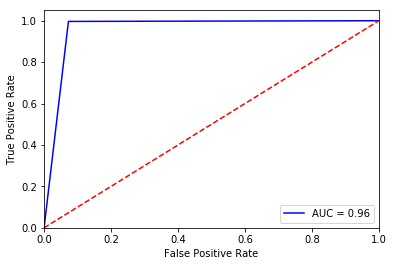

The confusion matrix of test dataset:
[[47  0]
 [67  0]]

The ROC curve for testing dataset:


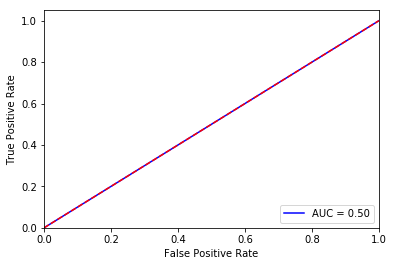

                  AUC  Accuracy        F1  Precision    Recall
sl_training  0.966177  0.972967  0.978932   0.966741  0.991533
sl_test      0.500000  0.394444  0.000000   0.000000  0.000000


In [139]:
    train_metrics = {}
    test_metrics = {}
    for i in range(0,30):
        print("\nThe No.%d epoch in Monte-Carlo:" %(i+1))
        train_x, test_x, train_y, test_y = train_test_split(data.drop([1], axis=1), data.loc[:,[1]], test_size = 0.2)
        min_max_scaler = preprocessing.MinMaxScaler()
        nor_train_x = min_max_scaler.fit_transform(train_x)
        if i==29:
            ss_model(nor_train_x, train_y, test_x, test_y, True)
        else:
            ss_model(nor_train_x, train_y, test_x, test_y, False)
    train_metrics["Accuracy"] = np.mean(ss_train_acc)
    train_metrics["Precision"] = np.mean(ss_train_prec)
    train_metrics["Recall"] = np.mean(ss_train_recall)
    train_metrics["F1"] = np.mean(ss_train_f1)
    train_metrics["AUC"] = np.mean(ss_train_auc)
    test_metrics["Accuracy"] = np.mean(ss_test_acc)
    test_metrics["Precision"] = np.mean(ss_test_prec)
    test_metrics["Recall"] = np.mean(ss_test_recall)
    test_metrics["F1"] = np.mean(ss_test_f1)
    test_metrics["AUC"] = np.mean(ss_test_auc)
    
    ss_metrics = pd.DataFrame([train_metrics,test_metrics],index=["sl_training","sl_test"])
    print(ss_metrics)

### (b)iii. Unsupervised Learning with Monte-Carlo Simulation

In [140]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
import itertools
from scipy.stats import mode
us_train_acc = []
us_train_prec = []
us_train_recall = []
us_train_f1 = []
us_train_auc = []
us_test_acc = []
us_test_prec = []
us_test_recall = []
us_test_f1 = []
us_test_auc = []
def us_model(train_x, train_y, test_x, test_y, flag):
    
    kmean = KMeans(n_clusters=2, random_state=0).fit(train_x)
    
    ccl1 = list()
    ccl2 = list()
    center1 = pd.DataFrame()
    center2 = pd.DataFrame()
    training_x = train_x
    for i in range(30):
        closest = 0
        closest, _ = pairwise_distances_argmin_min(kmean.cluster_centers_, training_x)
        ccl1.append(closest[0])
        ccl2.append(closest[1])
        if i is not 29:
            training_x = training_x.drop(training_x.index[closest[0]])
            training_x = training_x.drop(training_x.index[closest[1]])
    center1 = train_y.loc[ccl1]
    center2 = train_y.loc[ccl2]
    type1 = center1.mode()
    type2 = center2.mode()
    
    
    train_y_pred = kmean.predict(train_x)
    acc_train = accuracy_score(train_y, train_y_pred)
    us_train_acc.append(acc_train)
    prec_train = precision_score(train_y, train_y_pred)
    us_train_prec.append(prec_train)
    recall_train = recall_score(train_y, train_y_pred)
    us_train_recall.append(recall_train)
    f1_train = f1_score(train_y, train_y_pred)
    us_train_f1.append(f1_train)
    
    fpr, tpr, threshold = metrics.roc_curve(train_y, train_y_pred)
    auc_train = metrics.auc(fpr, tpr)
    us_train_auc.append(auc_train)
    print("For training dataset, accuracy = %.3f, precision = %.3f, recall = %.3f, F1 score = %.3f, AUC = %.3f" %(acc_train, prec_train, recall_train,f1_train,auc_train))

    #test dataset
    test_y_pred = kmean.predict(test_x)
    acc_test = accuracy_score(test_y, test_y_pred)
    us_test_acc.append(acc_test)
    prec_test = precision_score(test_y, test_y_pred)
    us_test_prec.append(prec_test)
    recall_test = recall_score(test_y, test_y_pred)
    us_test_recall.append(recall_test)
    f1_test = f1_score(test_y, test_y_pred)
    us_test_f1.append(f1_test)
    fpr, tpr, threshold = metrics.roc_curve(test_y, test_y_pred)
    auc_test = metrics.auc(fpr, tpr)
    us_test_auc.append(auc_test)
    print("For test dataset, accuracy = %.3f, precision = %.3f, recall = %.3f, F1 score = %.3f, AUC = %.3f" %(acc_test, prec_test, recall_test,f1_test,auc_test))
    
    if flag:
        print("\nThe confusion matrix of training dataset:")
        print(metrics.confusion_matrix(train_y, train_y_pred))
        print("\nThe ROC curve for training dataset:")
        fpr, tpr, threshold = metrics.roc_curve(train_y, train_y_pred)
        roc_auc = metrics.auc(fpr, tpr)
        plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
        plt.legend(loc = 'lower right')
        plt.plot([0, 1], [0, 1],'r--')
        plt.xlim([0, 1])
        plt.ylim([0, 1.05])
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.show()
        print("The confusion matrix of test dataset:")
        print(metrics.confusion_matrix(test_y, test_y_pred))
        print("\nThe ROC curve for testing dataset:")
        fpr, tpr, threshold = metrics.roc_curve(test_y, test_y_pred)
        roc_auc = metrics.auc(fpr, tpr)
        plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
        plt.legend(loc = 'lower right')
        plt.plot([0, 1], [0, 1],'r--')
        plt.xlim([0, 1])
        plt.ylim([0, 1.05])
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.show()


The No.1 epoch in Monte-Carlo:
For training dataset, accuracy = 0.145, precision = 0.000, recall = 0.000, F1 score = 0.000, AUC = 0.193
For test dataset, accuracy = 0.158, precision = 0.040, recall = 0.014, F1 score = 0.020, AUC = 0.214

The No.2 epoch in Monte-Carlo:
For training dataset, accuracy = 0.152, precision = 0.010, recall = 0.003, F1 score = 0.005, AUC = 0.204
For test dataset, accuracy = 0.132, precision = 0.000, recall = 0.000, F1 score = 0.000, AUC = 0.170

The No.3 epoch in Monte-Carlo:
For training dataset, accuracy = 0.857, precision = 0.818, recall = 0.997, F1 score = 0.899, AUC = 0.805
For test dataset, accuracy = 0.825, precision = 0.773, recall = 1.000, F1 score = 0.872, AUC = 0.783

The No.4 epoch in Monte-Carlo:
For training dataset, accuracy = 0.141, precision = 0.010, recall = 0.003, F1 score = 0.005, AUC = 0.190
For test dataset, accuracy = 0.158, precision = 0.000, recall = 0.000, F1 score = 0.000, AUC = 0.200

The No.5 epoch in Monte-Carlo:
For training dat

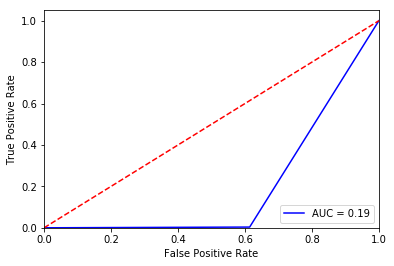

The confusion matrix of test dataset:
[[17 24]
 [73  0]]

The ROC curve for testing dataset:


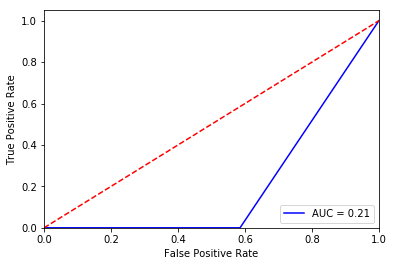

               AUC  Accuracy        F1  Precision    Recall
us_train  0.298611  0.264908  0.151532   0.140019  0.168182
us_test   0.294266  0.264327  0.153828   0.143586  0.170003


In [141]:
    train_metrics = {}
    test_metrics = {}
    for i in range(0,30):
        print("\nThe No.%d epoch in Monte-Carlo:" %(i+1))
        train_x, test_x, train_y, test_y = train_test_split(data.drop([1], axis=1), data.loc[:,[1]], test_size = 0.2)
#         min_max_scaler = preprocessing.MinMaxScaler()
#         nor_train_x = min_max_scaler.fit_transform(train_x)
        if i==29:
            us_model(train_x, train_y, test_x, test_y, True)
        else:
            us_model(train_x, train_y, test_x, test_y, False)
    train_metrics["Accuracy"] = np.mean(us_train_acc)
    train_metrics["Precision"] = np.mean(us_train_prec)
    train_metrics["Recall"] = np.mean(us_train_recall)
    train_metrics["F1"] = np.mean(us_train_f1)
    train_metrics["AUC"] = np.mean(us_train_auc)
    test_metrics["Accuracy"] = np.mean(us_test_acc)
    test_metrics["Precision"] = np.mean(us_test_prec)
    test_metrics["Recall"] = np.mean(us_test_recall)
    test_metrics["F1"] = np.mean(us_test_f1)
    test_metrics["AUC"] = np.mean(us_test_auc)
    
    us_metrics = pd.DataFrame([train_metrics,test_metrics],index=["us_train","us_test"])
    print(us_metrics)

In [153]:
from sklearn.cluster import SpectralClustering
from sklearn.manifold import SpectralEmbedding
train_x, test_x, train_y, test_y = train_test_split(data.drop([1], axis=1), data.loc[:,[1]], test_size = 0.2)
print(train_x.head())
print(train_y.head())
embedding = SpectralEmbedding(n_components=2, gamma = 1, random_state=0, affinity="rbf")
X_trans_train = embedding.fit_transform(train_x)
kMeans_model = KMeans(n_clusters=2,n_init=10).fit(X_trans_train)
sp_clus_lab = pd.DataFrame(KMeans_model.labels_)
print(sp_clus_lab)

         2      3       4       5        6        7        8        9   \
266  10.600  18.95   69.28   346.4  0.09688  0.11470  0.06387  0.02642   
451  19.590  25.00  127.70  1191.0  0.10320  0.09871  0.16550  0.09063   
43   13.280  20.28   87.32   545.2  0.10410  0.14360  0.09847  0.06158   
60   10.170  14.88   64.55   311.9  0.11340  0.08061  0.01084  0.01290   
152   9.731  15.34   63.78   300.2  0.10720  0.15990  0.41080  0.07857   

         10       11   ...        22     23      24      25      26       27  \
266  0.1922  0.06491   ...     11.88  22.94   78.28   424.8  0.1213  0.25150   
451  0.1663  0.05391   ...     21.44  30.96  139.80  1421.0  0.1528  0.18450   
43   0.1974  0.06782   ...     17.38  28.00  113.10   907.2  0.1530  0.37240   
60   0.2743  0.06960   ...     11.02  17.45   69.86   368.6  0.1275  0.09866   
152  0.2548  0.09296   ...     11.02  19.49   71.04   380.5  0.1292  0.27720   

          28       29      30       31  
266  0.19160  0.07926  0.2940  0.

LinAlgError: the leading minor of order 12 of 'b' is not positive definite. The factorization of 'b' could not be completed and no eigenvalues or eigenvectors were computed.